**Types of Machine Learning**: Supervised learning has labels given in with the data while unsupervised learning does not come with labels and rather the computer looks for patterns within the data to learn from it and then create levels according to it! Reinforcement learning is not a common model to use, but is really used in robotics and in AI + video games, because you can describe what actions should be awarded and/or punsihed (not necessarily labels but it is feedback based on certain actions).



**Regression v. Classification:** Regression looks if a value is close to a line of best fit for example, while classification seeks to put a value into a class or gives an error if it doesnt fit into one

# Lab \#7: Linear Regression Part I
---

In this week's lab, we will see how to implement linear regression using sklearn, visualize the predictions made by your models, and make both predictions and inferences from them. This is broken down into two parts based on several classic datasets provided by sklearn:

**Part 1**: California Housing Prices

**Part 2**: Diabetes Progression

<br>

The main goals today are to see how each step of the implementation process either changes or, in many cases, stays the same as we have seen with KNN. 

<br>

**Cheat Sheet**:

[Linear Regression with sklearn](https://docs.google.com/document/d/1fmIR5pvfxAFz_GGHun0dyE0CFWXe4_OWWeFRkZ1K13w/edit?usp=sharing)

## **Part 0: Import sklearn**
---

**Run the code below before continuing.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## **Part 1: California Housing Prices**
---


This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). We will use the data to help make a model that will predict the median house value for California in 1990.

### **Step #1: Load in data**
---

In [ ]:
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['MedianValue'] = cali_data.target

Notice that we are getting this data from sklearn. Since this library is used so much in machine learning, it also has several datasets that you can easily import and use. One nice feature of these datasets is that they have an attribute called `DESCR` that will describe all the columns in the dataset and any other information that might be relevant.

**Run the code below to see a description of this dataset.**

In [ ]:
print(cali_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### **Steps #2 - 3: Decide our variables and split data into training and test sets**
---

**To start, we will actually use all of our features.** As we will see, linear regression is much less sensitive to the number of features than KNN. Correlations do play a role, but it's a more subtle one.

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# since we're using so many features, it's easier to just specify which ones we're not using

inputs = df.drop("MedianValue", axis=1) #uses all features except for medianValue
output = df["MedianValue"]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Standardize** the data before moving on. This is generally good practice.

In [ ]:
# Standardize our training and testing datasets
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

### **Step #4: Import our model from sklearn**
---

In [ ]:
# import the linear regression algorithm
from sklearn.linear_model import LinearRegression

### **Step \#5: Initialize your model**
---

No hyperparameters for standard linear regression, so we just need to initialize the model.

In [ ]:
# COMPLETE THIS LINE
model = LinearRegression()

### **Step \#6: Fit your model on the training data**
---

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### **Step \#7: Test your model**
---

Since the model that linear regression gives us is a line, we can easily visualize the predictions it makes. In particular, let's compare the true values versus the predicted values using a scatter plot. We will also plot a line showing what the perfect predictions would look like.

In [ ]:
# COMPLETE THIS LINE TO MAKE PREDICTIONS FROM THE TEST DATA
predictions = model.predict(X_test)

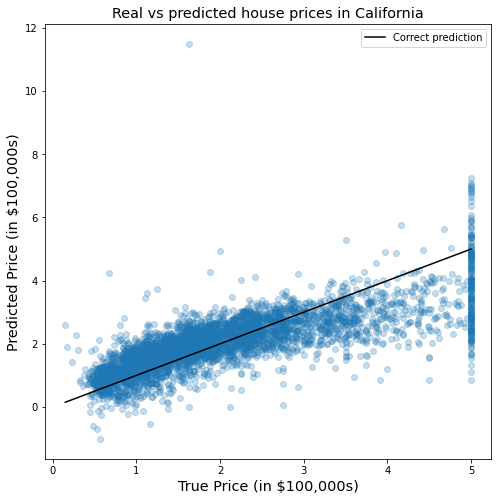

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha = 0.25) #means we want 25% transparency for all vlaues on the graph
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Price (in $100,000s)', fontsize = 'x-large')
plt.ylabel('Predicted Price (in $100,000s)', fontsize = 'x-large')
plt.title("Real vs predicted house prices in California", fontsize = 'x-large')
plt.legend()

plt.show()

### **Step \#8: Apply your model**
---

**1. Predict the median house value of a district that has:**
* median income (in $100,000) of 0.8
* average house age of 14 years old
* 1.8 average rooms
* 1.1 average bedrooms
* a population of 3500
* 1.2 average occupants
* located at 38.1 Latitude, -121.08 Longitude

In [ ]:
new_house = pd.DataFrame([[0.8, 14, 1.8, 1.1, 3500, 1.2, 38.1, -121.08]], 
                         columns=X_test.columns)

new_house = (new_house - mu)/sig

model.predict(new_house)

array([0.61922272])

**2. Predict the median house value of a district that has:**
* median income (in $100,000) of 11
* average house age of 56 years old
* 12 average rooms
* 9 average bedrooms
* a population of 12000
* 4.2 average occupants
* located at 34.0 Latitude, -118.0 Longitude

In [ ]:
new_house = pd.DataFrame([[# COMPLETE THIS LINE
                         columns=X_test.columns)

new_house = (new_house - mu)/sig

model.predict(new_house)

**3. Predict the median house value of a district that has:**
* median income (in $100,000) of 2.3
* average house age of 56 years old
* 4.6 average rooms
* 1.1 average bedrooms
* a population of 22000
* 2.8 average occupants
* located at 38.5 Latitude, -121.5 Longitude

In [ ]:
# COMPLETE THIS LINE

new_house = (new_house - mu)/sig

model.predict(new_house)

**4. Infer the relationship between Median Income and Median House Price**

Let's plot the Median Income (the `MedInc` column) from the test data (`X_test`) and see what our model predicted for these values. This way, we can get a sense of the relationship that our model claims to exist between this particular variable and the median house price.

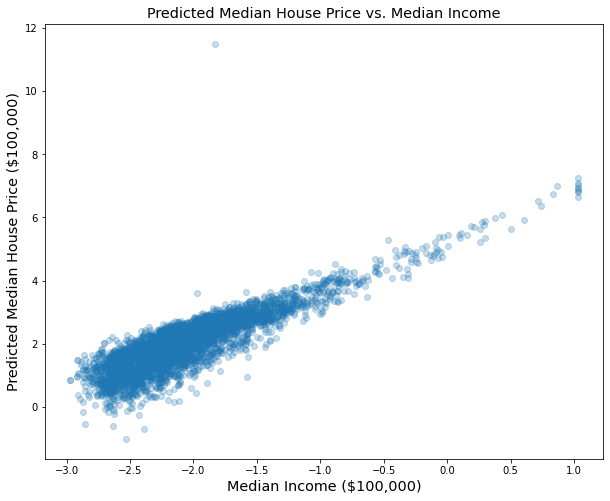

In [ ]:
median_income = X_test["MedInc"]
median_income = (median_income - mu["MedInc"])/sig["MedInc"]

plt.figure(figsize = (10, 8))
plt.scatter(median_income, predictions, alpha = 0.25)

plt.title("Predicted Median House Price vs. Median Income", fontsize = 'x-large')
plt.xlabel("Median Income ($100,000)", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

**5. Infer the relationship between Population and Median House Price**

Plot the Population (the `Population` column) from the test data (`X_test`) and see what our model predicted for these values. This way, we can get a sense of the relationship that our model claims to exist between this particular variable and the median house price.

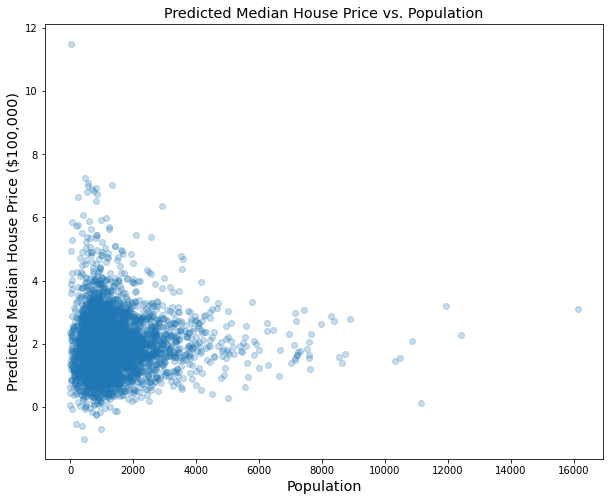

In [ ]:
population = X_test['Population']

population = population*sig["Population"] + mu["Population"]

plt.figure(figsize = (10, 8))
plt.scatter(population, predictions, alpha = 0.25)

plt.title("Predicted Median House Price vs. Population", fontsize = 'x-large')
plt.xlabel("Population", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

Notice that most of the datapoints are from a population of 0 to roughly 6000. However, these points are all squished together so that the plot can show all of the data points, which seem to go up to a population of 16000. This makes it hard to see what kind of relationship may exist for the bulk of data points!

We can zoom in on most of the data by limiting our xaxis to just 6000 using one extra line:

```python
plt.xlim(0, 6000)
```

where this sets the lower (`0`) and upper (`6000`) limits of the x-axis.

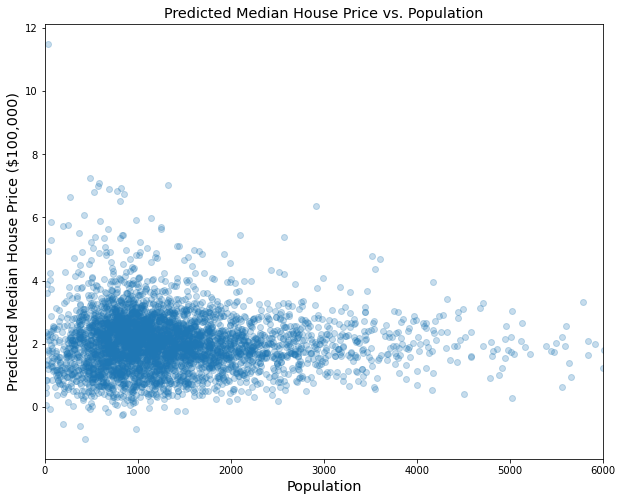

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(population, predictions, alpha = 0.25)

# COMPLETE THIS LINE TO CHANGE THE XAXIS LIMITS WITH XLIM(...)
plt.xlim(0, 6000)

plt.title("Predicted Median House Price vs. Population", fontsize = 'x-large')
plt.xlabel("Population", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

## **Part 2: Diabetes Progression**
---


This dataset contains data from diabetic patients with features such as their bmi, age, blood pressure, and more. The target variable (label) is a quantitative measure of how the disease progressed over a year for each person. We will try to use linear regression to help predict disease progression in diabetic patients. 

This is a use of machine learning that researchers are very interested in because it could help doctors know which patients they should give extra care to and which variables (features) have the highest impact on the progression of their patients' diseases. This could improve the health and life of many people!

### **Step #1: Load in data**
---

The first cell below will load in another dataset that sklearn provides. After running this, use the cell below that to look at a description of this dataset like we did in the previous part.

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['progression'] = diabetes.target

Look at the description of this dataset using the `.DESCR` attribute that sklearn provides.

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### **Steps #2 - 3: Decide our variables and split data into training and test sets**
---

Just like we did above, we do not need to worry about selecting and scaling features. So, just create the training and test datasets in the space below.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)

**Standardize** the data before moving on. This is generally good practice.

In [ ]:
# Standardize our training and testing datasets
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

### **Step #4: Import our model from sklearn**
---

In [ ]:
# import the linear regression algorithm
from sklearn.linear_model import LinearRegression

### **Step \#5: Initialize your model**
---

No hyperparameters for standard linear regression, so we just need to initialize the model.

In [ ]:
model = LinearRegression()

### **Step \#6: Fit your model on the training data**
---

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### **Step \#7: Test your model**
---

Visualize how the predictions compare to the real test data, including a line plot showing what perfect predictions would look like.

In [ ]:
# # COMPLETE THIS LINE TO MAKE PREDICTIONS FROM THE TEST DATA
predicitions = model.predict(X_test)

ValueError: ignored

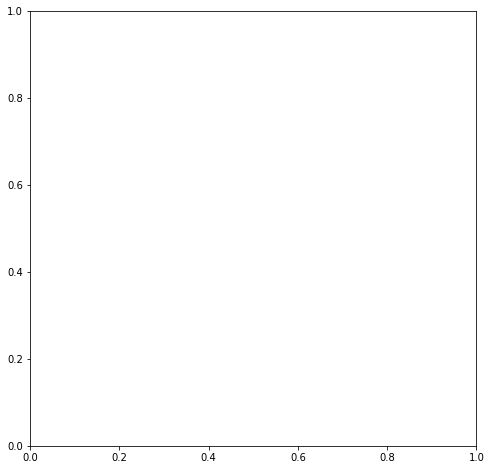

In [ ]:
# COMPLETE THIS CODE
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha = 0.25) #means we want 25% transparency for all vlaues on the graph
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Progression', fontsize = 'x-large')
plt.ylabel('Predicted Progression', fontsize = 'x-large')
plt.title("Real vs predicted progression of diabetes", fontsize = 'x-large')
plt.legend()

plt.show()

### **Step \#8: Apply your model**
---

Now, a doctor provides you with data from two new patients and wants to know if either of them are likely to experience a fast progression in the next year. In particular, the doctor said to let them know if either patient is predicted to have a progression over 200.

Their patients data is as follows:

**Patient 1**
* age = 0.045
* sex = 0.05
* bmi = -0.023
* bp = 0.014
* s1 through s6 = 0


**Patient 2**
* age = 0.039
* sex = -0.05
* bmi = 0.052
* bp = 0.028
* s1 through s6 = 0

**1. Predict patient 1's progression:**


In [ ]:
patient_1 = pd.DataFrame([[# COMPLETE THIS LINE
                         columns=X_test.columns)

patient_1 = (patient_1 - mu)/sig

# COMPLETE THIS LINE

**2. Predict patient 2's progression:**

In [ ]:
patient_2 = pd.DataFrame([[# COMPLETE THIS LINE
                         columns=X_test.columns)

patient_2 = (patient_2 - mu)/sig

# COMPLETE THIS LINE

Are either, or both, of the patients predicted to have a progression over 200?

**3. Infer the relationship between Age and Progression**

It's very helpful to be able to make predictions like this. But what should the doctor do for a patient that's likely to have a fast progression? In order to answer this question, we need to infer which features have a strong impact on progression.

To start, age is a factor that doctors and patients obviously cannot change. So, it's important to understand if the progression is particularly high or low simply because of age or if there's something else that might be going on.

**Plot the Age (the `age` column) from the test data (`X_test`) and see what our model predicted for these values. This way, we can get a sense of the relationship that our model claims to exist between this particular variable and the progression of diabetes.**

In [ ]:
age = X_test['age']
age = age * sig["age"] + mu["age"]


# COMPLETE THIS CODE
plt.scatter(age, predicitions)

KeyError: ignored

**4. Infer the relationship between BMI and Progression**

Now, the doctor says that they believe BMI (body mass index) plays a role in progression, but has seen several patients where this was not the case at all. So, the doctor would like to understand if those patients were exceptions to the rule or if there's generally a relationship between BMI and progression.


**Plot the BMI (the `bmi` column) from the test data (`X_test`) and see what our model predicted for these values. This way, we can get a sense of the relationship that our model claims to exist between this particular variable and the progression of diabetes.**

In [ ]:
bmi = # COMPLETE THIS LINE
bmi = bmi * sig["bmi"] - mu["bmi"]

# COMPLETE THIS CODE

**Congratulations! You just created, tested, and applied your first linear regression model on your own!**

---

© 2022 The Coding School, All rights reserved